**Import all libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout 
import os 
import cv2
import matplotlib.pyplot as plt
import imghdr #built-in module that provides functions for determining the type of image file based on its content.
import numpy as np

In [3]:
data_dir='E:\data_dir'
image_exts=['jpeg','jpg', 'bmp', 'png'] #cv2 supports image formats

**show image from data**

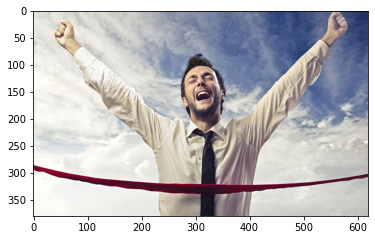

In [4]:
class_name =os.listdir(data_dir)
img_path=os.path.join(data_dir,class_name[0],'Successful-year.jpg')
img=cv2.imread(img_path) #BGR
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #RGB
plt.show()

**Remove dodgy images**

In [5]:
for class_na in class_name:
    for image in os.listdir(os.path.join(data_dir,class_na)):
        image_path=os.path.join(data_dir,class_na,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path) #This function takes a filename as input and returns the type of image file based on its content
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

**Load Data**

In [46]:
data =tf.keras.utils.image_dataset_from_directory(data_dir) #default batch_size=32, image_size=(256, 256)

Found 172 files belonging to 2 classes.


In [47]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [48]:
batch[0].shape

(32, 256, 256, 3)

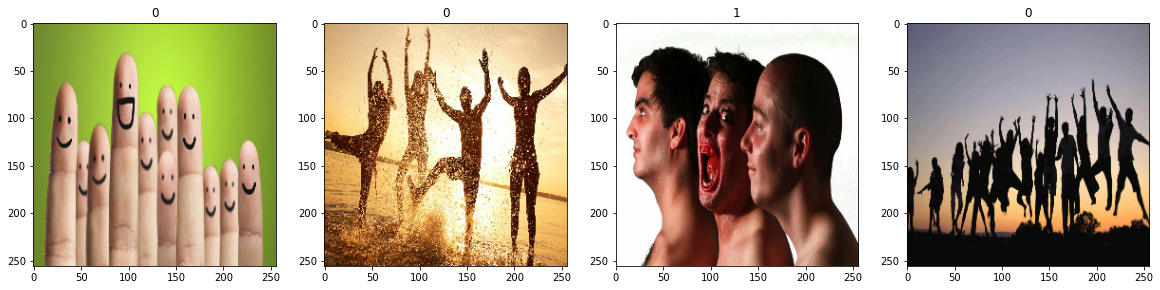

In [49]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for ind,img in enumerate(batch[0][:4]):
    ax[ind].imshow(img.astype(int))
    ax[ind].title.set_text(batch[1][ind])

**scale data**

In [9]:
data =data.map(lambda x,y:(x/255,y) )

In [10]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9177849 , 0.95307904, 0.9726869 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9177849 , 0.95307904, 0.9726869 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9254902 , 0.9607843 , 0.98039216],
          [0.9191544 , 0.9544485 , 0.97405636]],
 
         ...,
 
         [[0.44886643, 0.44886643, 0.45670956],
          [0.98885

**split data**

In [11]:
train_size=int(len(data)*.7) #4
val_size=int(len(data)*.2)#1
test_size =int(len(data)*.2)#1

In [12]:
train =data.take(train_size) #method returns a new dataset with the specified number of elements

In [13]:
val =data.skip(train_size).take(val_size)
test =data.skip(train_size+val_size).take(test_size)

**Build a deep learning model**

In [14]:
model =Sequential()

In [15]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) 

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D()) 

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D()) 

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Train a model**

In [18]:
logdir='logs'
#By using the TensorBoard callback, we can gain valuable insights into the behavior of a machine learning model during training,
#and use this information to improve the model's performance.

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist=model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback] )

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 1.6767 - accuracy: 0.4844 - val_loss: 1.0732 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.8062 - accuracy: 0.5312 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6434 - accuracy: 0.5625 - val_loss: 0.6640 - val_accuracy: 0.4688
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6318 - accuracy: 0.5547 - val_loss: 0.5674 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.5774 - accuracy: 0.6328 - val_loss: 0.5308 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.5268 - accuracy: 0.7578 - val_loss: 0.4460 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4822 - accuracy: 0.7422 - val_loss: 0.4822 - val_accuracy: 0.8125
Epoch 8/20
4/4 [=========================

**plot performance**

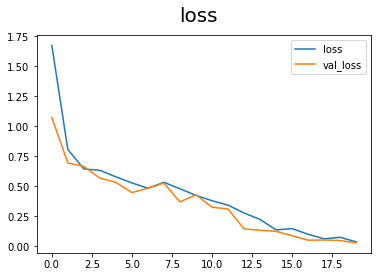

In [20]:
fig=plt.figure()
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend()
plt.show()

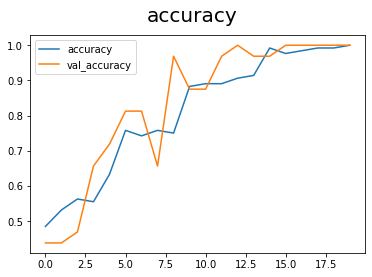

In [21]:
fig =plt.figure()
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend()
plt.show()

**Evaluate**

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 178ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


**Test**

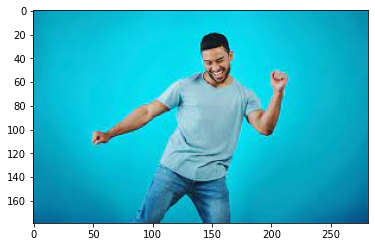

In [70]:
img =cv2.imread('E:\k.jpg')
new_img=tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
yhat= model.predict(np.expand_dims(new_img/255, 0))

1/1 [==============================] - 0s 31ms/step


In [72]:
if yhat> .5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Happy


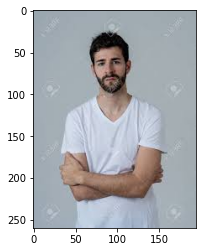

In [73]:
img =cv2.imread('E:\sad.jpg')
new_img=tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [74]:
yhat= model.predict(np.expand_dims(new_img/255, 0))

1/1 [==============================] - 0s 26ms/step


In [75]:
if yhat> .5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad


**save the model**

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save("sample_imageclassifier.h5")

**load the model**

In [79]:
new_model=load_model('sample_imageclassifier.h5')

In [80]:
yhat = new_model.predict(np.expand_dims(new_img/255, 0))

1/1 [==============================] - 0s 81ms/step


In [81]:
yhat

array([[0.98524696]], dtype=float32)